## What is Inflation

According to wikipedia,

In economics, inflation is a general increase in the prices of goods and services in an economy. When the general price level rises, each unit of currency buys fewer goods and services; consequently, inflation corresponds to a reduction in the purchasing power of money. The opposite of inflation is deflation, a sustained decrease in the general price level of goods and services. The common measure of inflation is the inflation rate, the annualized percentage change in a general price index. As prices do not all increase at the same rate, the consumer price index (CPI) is often used for this purpose. The employment cost index is also used for wages in the United States.

In this project we will scrape the tweets related to "Inflation" using {rtweet} package. We will see how people are giving their opinion on the topic on twitter.

In [9]:
library(tidyverse)
library(showtext)
library(patchwork)
library(tidytext)
library(reshape2)
library(ggtext)
library(lubridate)
library(janitor)
library(ggthemes)
library(MetBrewer)
library(showtext)
library(tidyr)
library(tm)
library(ggraph)
library(igraph)

library(repr)
options(repr.plot.width = 20, repr.plot.height =13)

font_add(family = "Roboto",regular  = "../input/roboto/RobotoCondensed-Regular.ttf")
showtext_auto()

In [3]:
inf <- read.csv("../input/tweets/inflation tweets data.csv")
user <- read.csv("../input/tweets/users.csv")

## Data Overview

In [4]:
head(inf)

,X,created_at,id,id_str,full_text,truncated,display_text_range,source,in_reply_to_status_id,in_reply_to_status_id_str,⋯,retweeted_status,quoted_status_permalink,quote_count,timestamp_ms,reply_count,filter_level,query,withheld_scope,withheld_copyright,possibly_sensitive_appealable
,<int>,<chr>,<dbl>,<dbl>,<chr>,<lgl>,<int>,<chr>,<dbl>,<dbl>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,1,2022-08-25 21:11:58,1.562828e+18,1.562828e+18,"<U+26FD><U+FE0F> In OECD Countries, #energy price #inflation jumped to 40.7% year-on-year in June 2022, up from 35.4% in May. <U+0001F4C8> <U+26A1><U+FE0F> Energy prices remained the main contributor to inflation in France, Germany, Italy and Japan. <U+0001F517> https://t.co/J5FEVTZD6i https://t.co/wUvB7Lr6rk",FALSE,238,"<a href=""http://www.falcon.io"" rel=""nofollow"">Brandwatch</a>",NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,2,2022-08-24 21:23:00,1.562468e+18,1.562468e+18,"In #Pakistan, things are going from bad to worse. PAK takes the 15th place in this week's inflation roundup. On Aug 18, I measured Pak's #inflation at a stunning 42%/yr. To crush inflation and save the rupee, Pakistan MUST mothball the State Bank and install a #CurrencyBoard. https://t.co/vc9WyBRBqu",FALSE,276,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,3,2022-08-24 12:47:56,1.562338e+18,1.562338e+18,"Good Morning from #Germany, where risk of a wage-price spiral is increasing. Harbour workers have signed pay rise of 9.4% from July 1 this yr followed by hike of 4.4% from Jun2023, incl #inflation clause covering an increase of up to 5.5%. Shows that inflation offset is possible. https://t.co/7OGtP7skLz",FALSE,280,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,4,2022-08-26 09:53:19,1.563019e+18,1.563019e+18,"Imagine giving your friends 3 Billion dollars, meanwhile your people are struggling to survive, and make ends meet. #Ukraine #JoeBiden #inflation #RussiaUkraineWar #UnitedStates",FALSE,177,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,5,2022-08-26 09:52:17,1.563019e+18,1.563019e+18,Inflation to rise further amid flood-hit economy https://t.co/SIXKph1ErY #inflation #economy #Newspaper,FALSE,103,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,6,2022-08-26 09:51:10,1.563019e+18,1.563019e+18,What do you call this expression? Comic coming in a while #inflationart #expansion #bodyinflation #breastinflation #bellyinflation #bellyexpansion #expansion #belly #expansion #chubby #fetishart #inflation #bigboobs #fullbodyexpansion #fullbodyinflation #bellyinflation<U+0001F499><U+0001F499><U+0001F499><U+0001F499> https://t.co/2YgLmS1vwZ,FALSE,275,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [5]:
dim(inf)

[1] 15921    37

There are total 15921 rows and 37 columns.

In [6]:
glimpse(inf)

Rows: 15,921
Columns: 37
$ X                             <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1…
$ created_at                    <chr> "2022-08-25 21:11:58", "2022-08-24 21:23…
$ id                            <dbl> 1.562828e+18, 1.562468e+18, 1.562338e+18…
$ id_str                        <dbl> 1.562828e+18, 1.562468e+18, 1.562338e+18…
$ full_text                     <chr> "<U+26FD><U+FE0F> In OECD Countries, #en…
$ truncated                     <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE…
$ display_text_range            <int> 238, 276, 280, 177, 103, 275, 95, 167, 2…
$ source                        <chr> "<a href=\"http://www.falcon.io\" rel=\"…
$ in_reply_to_status_id         <dbl> NA, NA, NA, NA, NA, NA, NA, 1.562936e+18…
$ in_reply_to_status_id_str     <dbl> NA, NA, NA, NA, NA, NA, NA, 1.562936e+18…
$ in_reply_to_user_id           <dbl> NA, NA, NA, NA, NA, NA, NA, 1.917731e+06…
$ in_reply_to_user_id_str       <dbl> NA, NA, NA, NA, NA, NA, NA, 1.917731e+06…
$ in_reply_to_s

In [7]:
as.data.frame(colSums(is.na(inf)))

,colSums(is.na(inf))
,<dbl>
X,0
created_at,0
id,0
id_str,0
full_text,0
truncated,0
display_text_range,0
source,0
in_reply_to_status_id,13585


We can see that there are many missing values in the dataset.

In [8]:
missing_values <- inf %>%
  gather(key = "key", value = "val") %>%
  mutate(isna = is.na(val)) %>%
  group_by(key) %>%
  mutate(total = n()) %>%
  group_by(key, total, isna) %>%
  summarise(num.isna = n()) %>%
  mutate(pct = num.isna / total * 100)

`summarise()` has grouped output by 'key', 'total'. You can override using the
`.groups` argument.


Warning message:
“Removed 15 rows containing missing values (position_stack).”


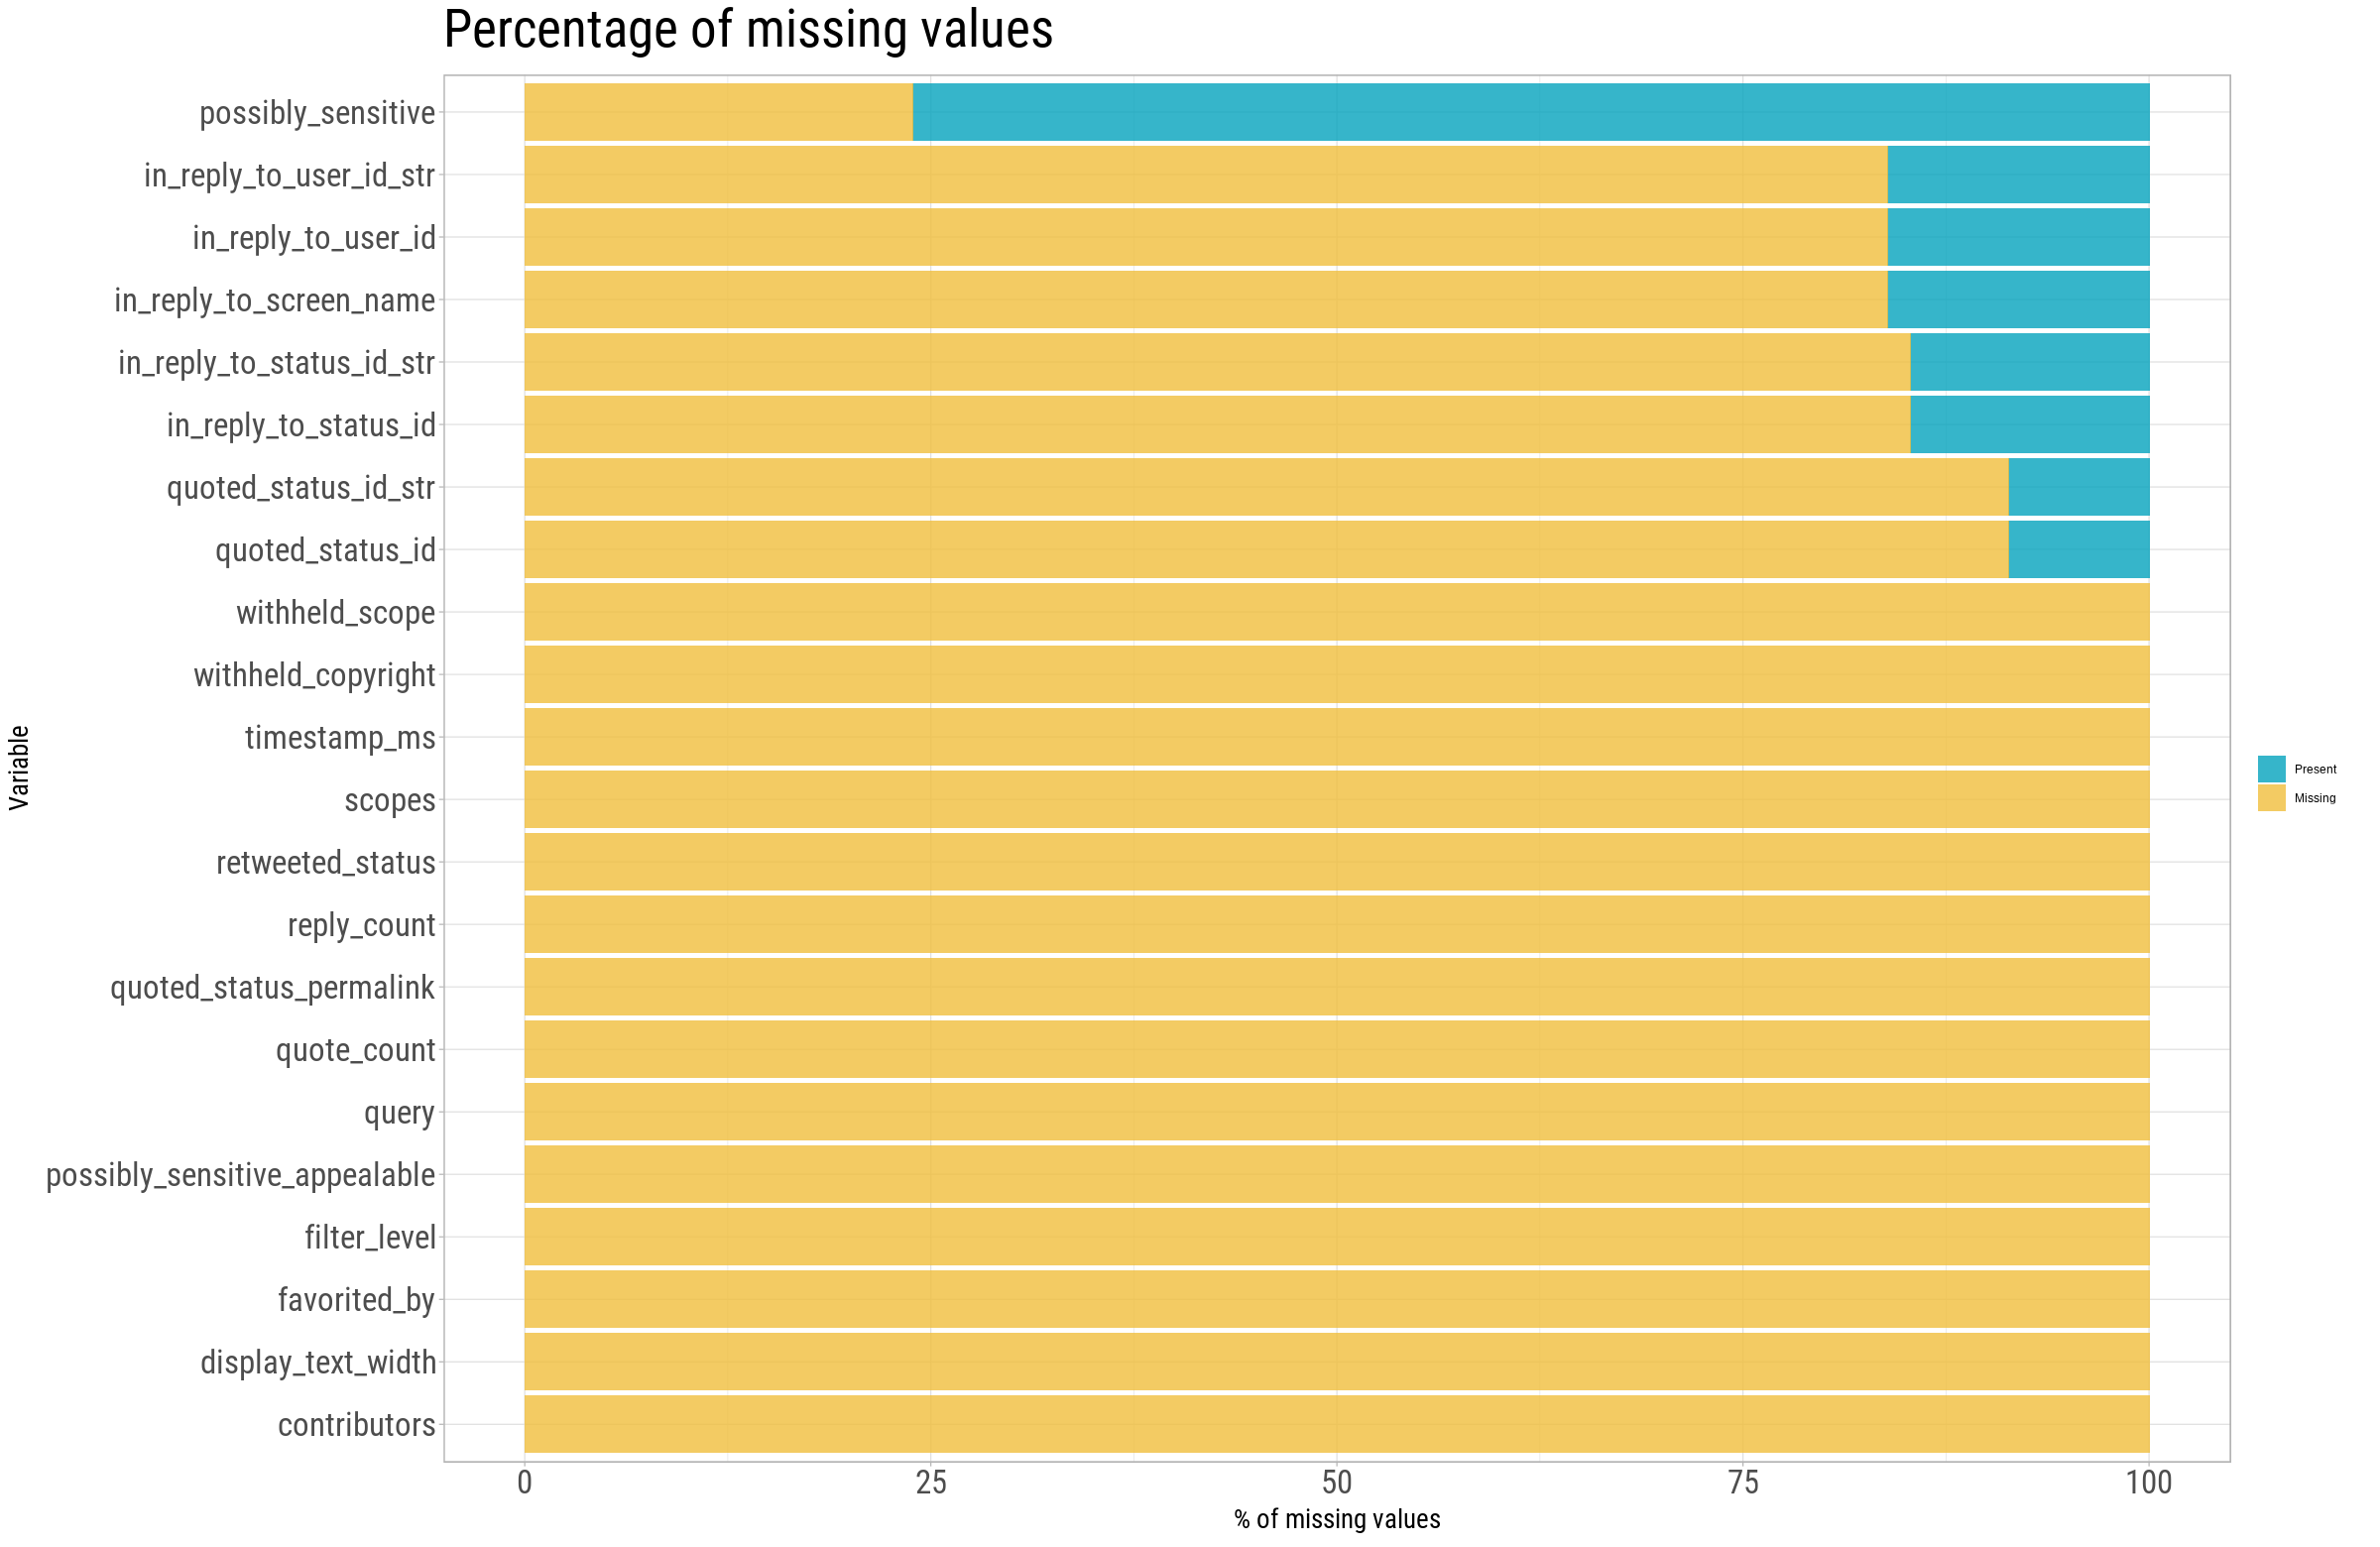

In [47]:
levels <-
    (missing_values  %>% filter(isna == T) %>% arrange(desc(pct)))$key

percentage.plot <- missing_values %>%
      ggplot() +
        geom_bar(aes(x = reorder(key, desc(pct)), 
                     y = pct, fill=isna), 
                 stat = 'identity', alpha=0.8) +
      scale_x_discrete(limits = levels) +
      scale_fill_manual(name = "", 
                        values = met.brewer("Lakota",2), labels = c("Present", "Missing")) +
      coord_flip() +
      labs(title = "Percentage of missing values", x =
             'Variable', y = "% of missing values")+
  theme_light()+
  theme(plot.title = element_text(size = 40, family = "Roboto", face = "bold"))+
  theme(axis.title.x = element_text(size = 20, family = 'Roboto'))+
  theme(axis.text.x =  element_text(size = 25, family = "Roboto", face = "bold"))+
  theme(axis.title.y = element_text(size = 20, family = "Roboto"))+
  theme(axis.text.y = element_text(size = 25, family = "Roboto", face = "bold"))

percentage.plot

But, we are not going to use all the columns for the analysis, we will only use columns which are important for the analysis. Let's create a cleaned dataframe.

## Data Preprocessing

We will select the important columns and convert the created_at date variable into year, month and day.

In [11]:
inf_clean <- inf %>%
  select(created_at,id,full_text,truncated,display_text_range,source,is_quote_status, retweet_count, favorite_count, favorited, retweeted, text)%>%
  mutate(created_at = as.Date(created_at))%>%
  mutate(year = year(created_at),
         month = month(created_at),
         day = day(created_at))
head(inf_clean)

,created_at,id,full_text,truncated,display_text_range,source,is_quote_status,retweet_count,favorite_count,favorited,retweeted,text,year,month,day
,<date>,<dbl>,<chr>,<lgl>,<int>,<chr>,<lgl>,<int>,<int>,<lgl>,<lgl>,<chr>,<dbl>,<dbl>,<int>
1,2022-08-25,1.562828e+18,"<U+26FD><U+FE0F> In OECD Countries, #energy price #inflation jumped to 40.7% year-on-year in June 2022, up from 35.4% in May. <U+0001F4C8> <U+26A1><U+FE0F> Energy prices remained the main contributor to inflation in France, Germany, Italy and Japan. <U+0001F517> https://t.co/J5FEVTZD6i https://t.co/wUvB7Lr6rk",FALSE,238,"<a href=""http://www.falcon.io"" rel=""nofollow"">Brandwatch</a>",FALSE,86,163,FALSE,FALSE,"<U+26FD><U+FE0F> In OECD Countries, #energy price #inflation jumped to 40.7% year-on-year in June 2022, up from 35.4% in May. <U+0001F4C8> <U+26A1><U+FE0F> Energy prices remained the main contributor to inflation in France, Germany, Italy and Japan. <U+0001F517> https://t.co/J5FEVTZD6i https://t.co/wUvB7Lr6rk",2022,8,25
2,2022-08-24,1.562468e+18,"In #Pakistan, things are going from bad to worse. PAK takes the 15th place in this week's inflation roundup. On Aug 18, I measured Pak's #inflation at a stunning 42%/yr. To crush inflation and save the rupee, Pakistan MUST mothball the State Bank and install a #CurrencyBoard. https://t.co/vc9WyBRBqu",FALSE,276,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",FALSE,91,179,FALSE,FALSE,"In #Pakistan, things are going from bad to worse. PAK takes the 15th place in this week's inflation roundup. On Aug 18, I measured Pak's #inflation at a stunning 42%/yr. To crush inflation and save the rupee, Pakistan MUST mothball the State Bank and install a #CurrencyBoard. https://t.co/vc9WyBRBqu",2022,8,24
3,2022-08-24,1.562338e+18,"Good Morning from #Germany, where risk of a wage-price spiral is increasing. Harbour workers have signed pay rise of 9.4% from July 1 this yr followed by hike of 4.4% from Jun2023, incl #inflation clause covering an increase of up to 5.5%. Shows that inflation offset is possible. https://t.co/7OGtP7skLz",FALSE,280,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",FALSE,233,903,FALSE,FALSE,"Good Morning from #Germany, where risk of a wage-price spiral is increasing. Harbour workers have signed pay rise of 9.4% from July 1 this yr followed by hike of 4.4% from Jun2023, incl #inflation clause covering an increase of up to 5.5%. Shows that inflation offset is possible. https://t.co/7OGtP7skLz",2022,8,24
4,2022-08-26,1.563019e+18,"Imagine giving your friends 3 Billion dollars, meanwhile your people are struggling to survive, and make ends meet. #Ukraine #JoeBiden #inflation #RussiaUkraineWar #UnitedStates",FALSE,177,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",FALSE,0,0,FALSE,FALSE,"Imagine giving your friends 3 Billion dollars, meanwhile your people are struggling to survive, and make ends meet. #Ukraine #JoeBiden #inflation #RussiaUkraineWar #UnitedStates",2022,8,26
5,2022-08-26,1.563019e+18,Inflation to rise further amid flood-hit economy https://t.co/SIXKph1ErY #inflation #economy #Newspaper,FALSE,103,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",FALSE,0,1,FALSE,FALSE,Inflation to rise further amid flood-hit economy https://t.co/SIXKph1ErY #inflation #economy #Newspaper,2022,8,26
6,2022-08-26,1.563019e+18,What do you call this expression? Comic coming in a while #inflationart #expansion #bodyinflation #breastinflation #bellyinflation #bellyexpansion #expansion #belly #expansion #chubby #fetishart #inflation #bigboobs #fullbodyexpansion #fullbodyinflation #bellyinflation<U+0001F499><U+0001F499><U+0001F499><U+0001F499> https://t.co/2YgLmS1vwZ,FALSE,275,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",FALSE,0,0,FALSE,FALSE,What do you call this expression? Comic coming in a while #inflationart #expansion #bodyinfla

In [12]:
inf_clean %>%
  count(day)

day,n
<int>,<int>
17,3219
18,3106
19,2115
20,1239
21,997
22,2040
23,2246
24,861
25,1


The tweets are from month august between days 17 and 26. There are 15921 unique users and hence the tweets.

In [19]:
inf_clean$text <- iconv(inf_clean$text, from = 'ISO-8859-1', to = 'utf8')

In [20]:
inf_clean$stripped_text <- inf_clean$text
inf_clean$stripped_text <- tolower(inf_clean$stripped_text)  
inf_clean$stripped_text <- gsub("@\\w+", "", inf_clean$stripped_text)  
inf_clean$stripped_text <- gsub("https?://.+", "", inf_clean$stripped_text)  
inf_clean$stripped_text <- gsub("\\d+\\w*\\d*", "", inf_clean$stripped_text)  
inf_clean$stripped_text <- gsub("#\\w+", "", inf_clean$stripped_text)  
inf_clean$stripped_text <- gsub("[^\x01-\x7F]", "", inf_clean$stripped_text)  
inf_clean$stripped_text <- gsub("[[:punct:]]", " ", inf_clean$stripped_text)
inf_clean$stripped_text <- gsub("\n", " ", inf_clean$stripped_text)  
inf_clean$stripped_text <- gsub("^\\s+", "", inf_clean$stripped_text)  
inf_clean$stripped_text <- gsub("\\s+$", "", inf_clean$stripped_text)  
inf_clean$stripped_text <- gsub("[ |\t]+", " ", inf_clean$stripped_text)

In [21]:
inf_tweets2 <- inf_clean %>%
  dplyr::select(stripped_text) %>%
  unnest_tokens(word, stripped_text)

In [22]:
data("stop_words")

head(stop_words)

nrow(inf_tweets2)

cleaned_tweet_words <- inf_tweets2 %>%
  anti_join(stop_words)

nrow(cleaned_tweet_words)

word,lexicon
<chr>,<chr>
a,SMART
a's,SMART
able,SMART
about,SMART
above,SMART
according,SMART


[1] 339341

Joining, by = "word"


[1] 153990

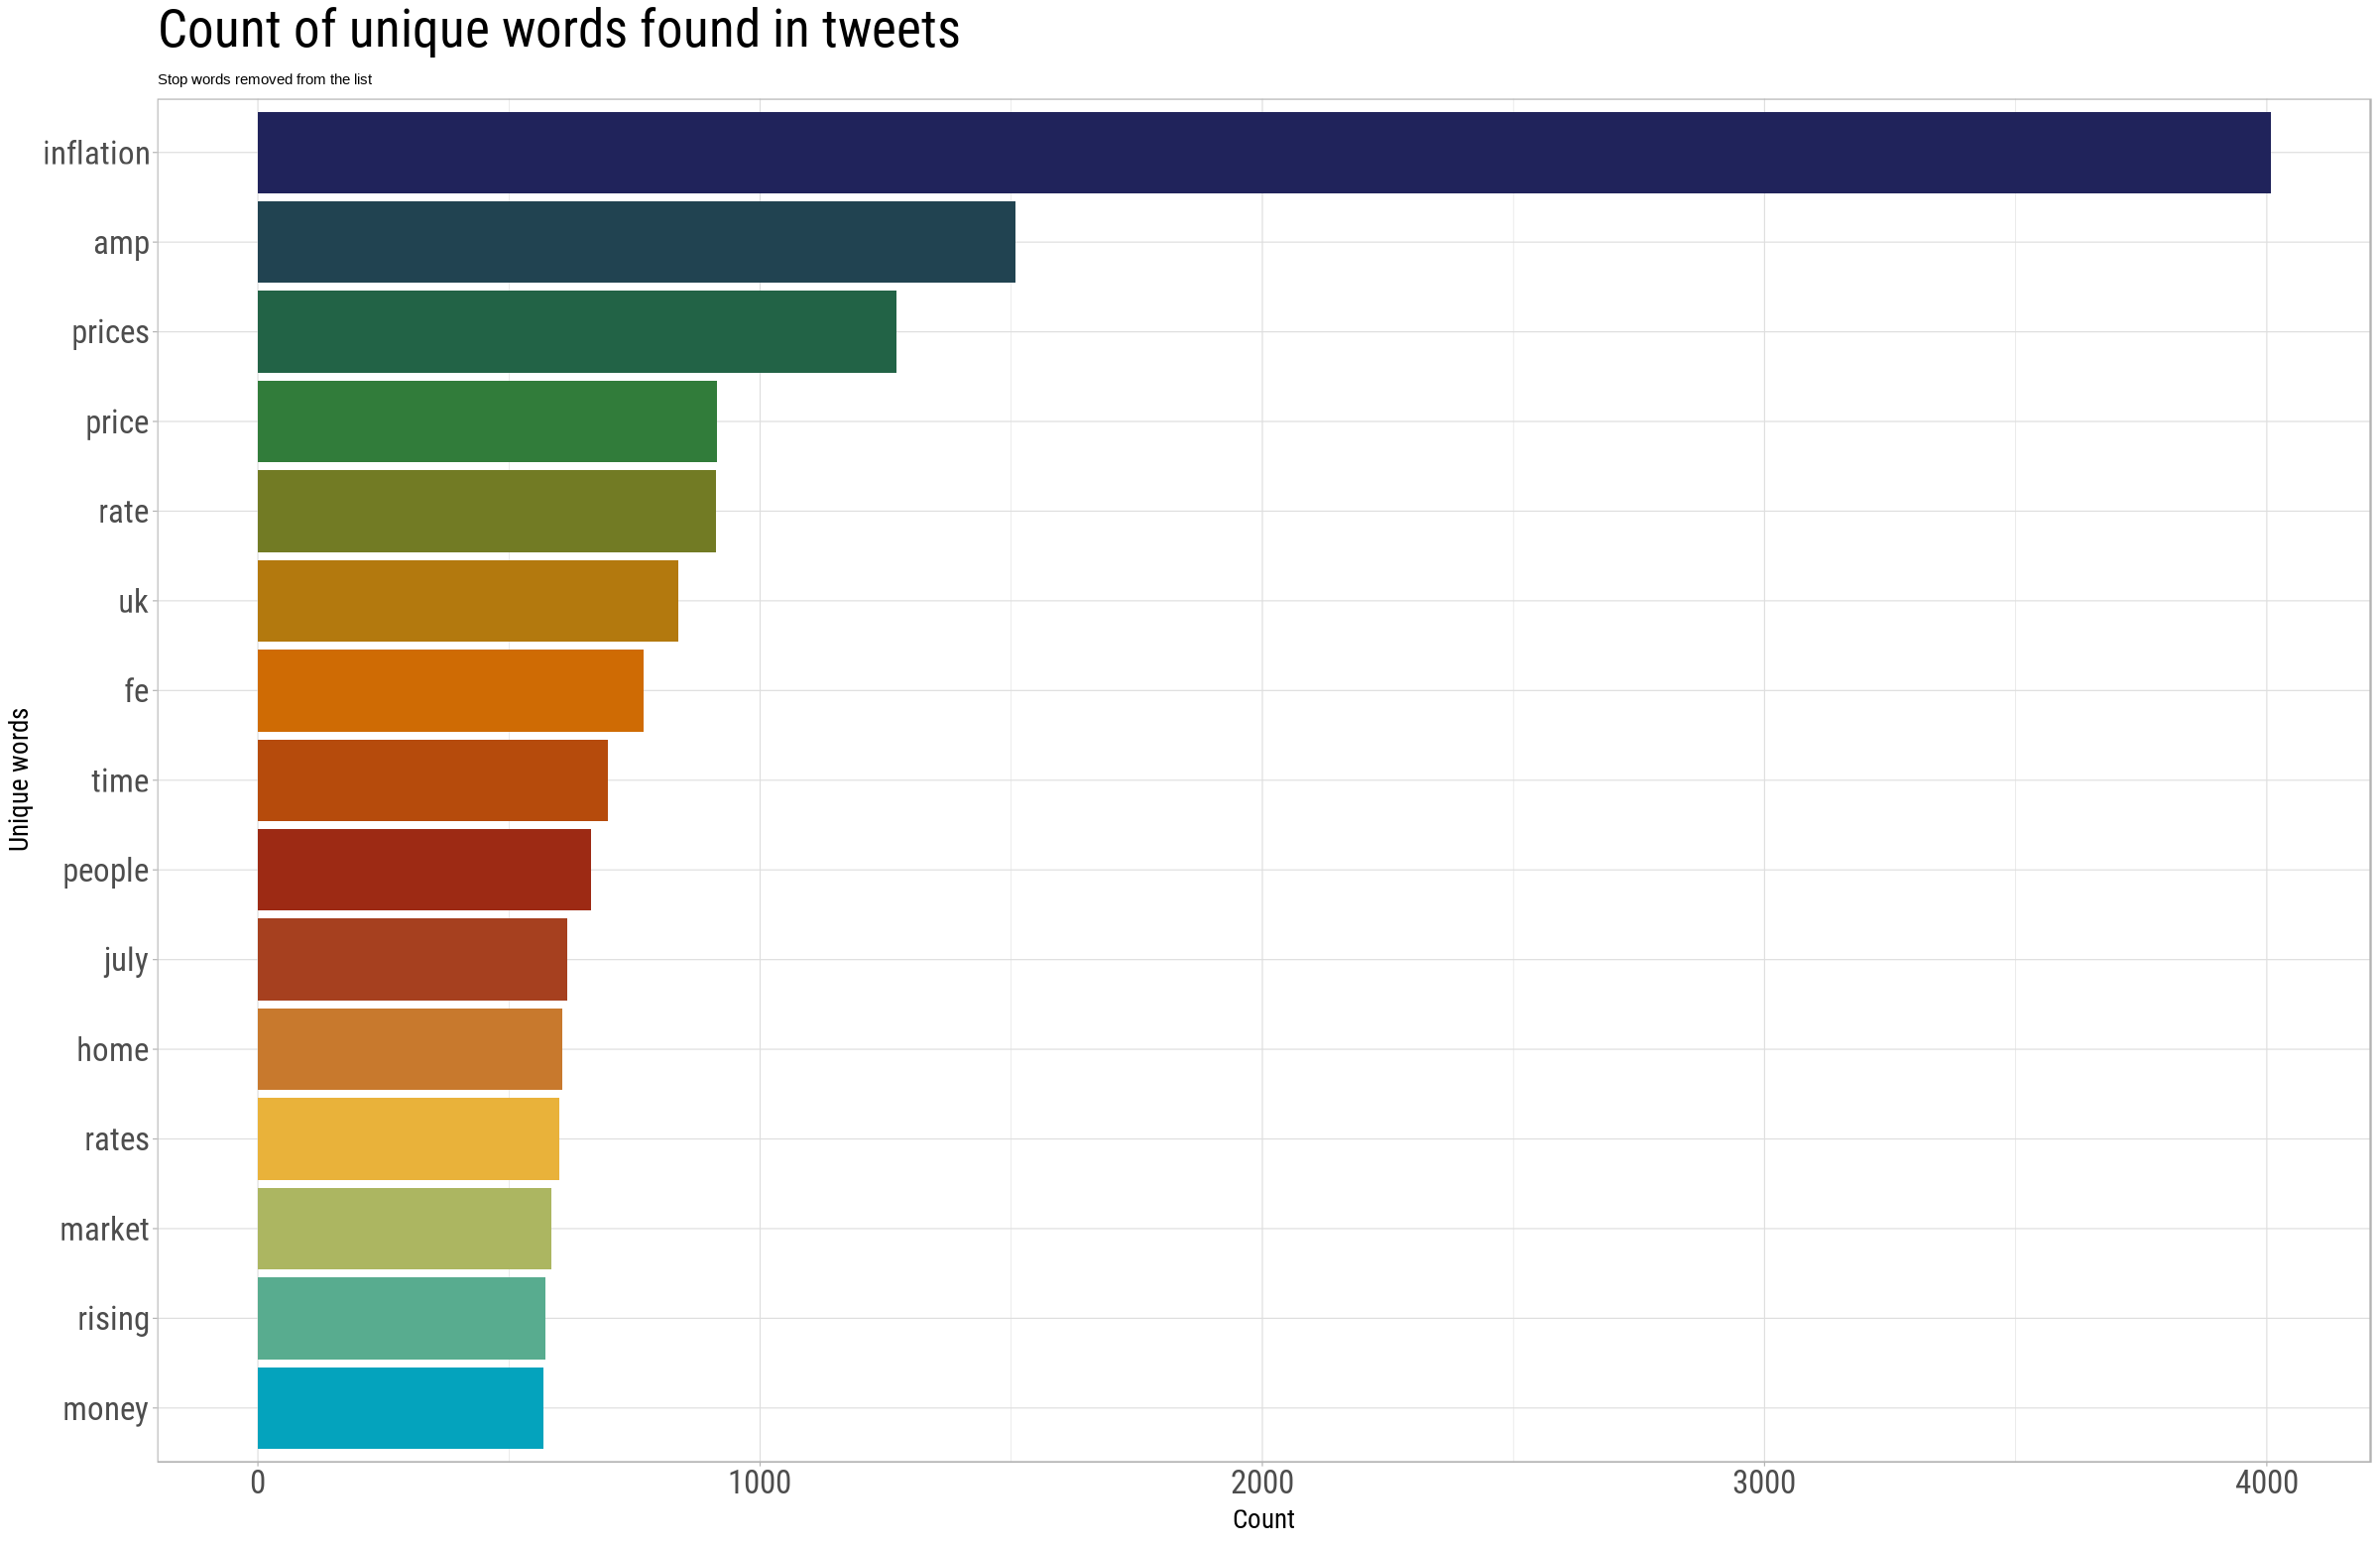

In [23]:
cleaned_tweet_words %>%
  count(word, sort = TRUE) %>%
  arrange(desc(n))%>%
  head(15)%>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(x = word, y = n, fill = word)) +
  geom_col() +
  xlab(NULL) +
  coord_flip() +
  scale_fill_manual(values = met.brewer("Lakota",15))+
  theme_light()+
  theme(plot.title = element_text(size = 40, family = "Roboto", face = "bold"))+
  theme(axis.title.x = element_text(size = 20, family = 'Roboto'))+
  theme(axis.text.x =  element_text(size = 25, family = "Roboto", face = "bold"))+
  theme(axis.title.y = element_text(size = 20, family = "Roboto"))+
  theme(axis.text.y = element_text(size = 25, family = "Roboto", face = "bold"))+
  theme(legend.position = "none")+
  labs(y = "Count",
      x = "Unique words",
      title = "Count of unique words found in tweets",
      subtitle = "Stop words removed from the list")

In [24]:
head(sentiments)

word,sentiment
<chr>,<chr>
2-faces,negative
abnormal,negative
abolish,negative
abominable,negative
abominably,negative
abominate,negative


In [25]:
bing_word_counts <- cleaned_tweet_words %>%
  inner_join(get_sentiments("bing")) %>%
  count(word, sentiment, sort = TRUE) %>%
  ungroup()

Joining, by = "word"


Selecting by n


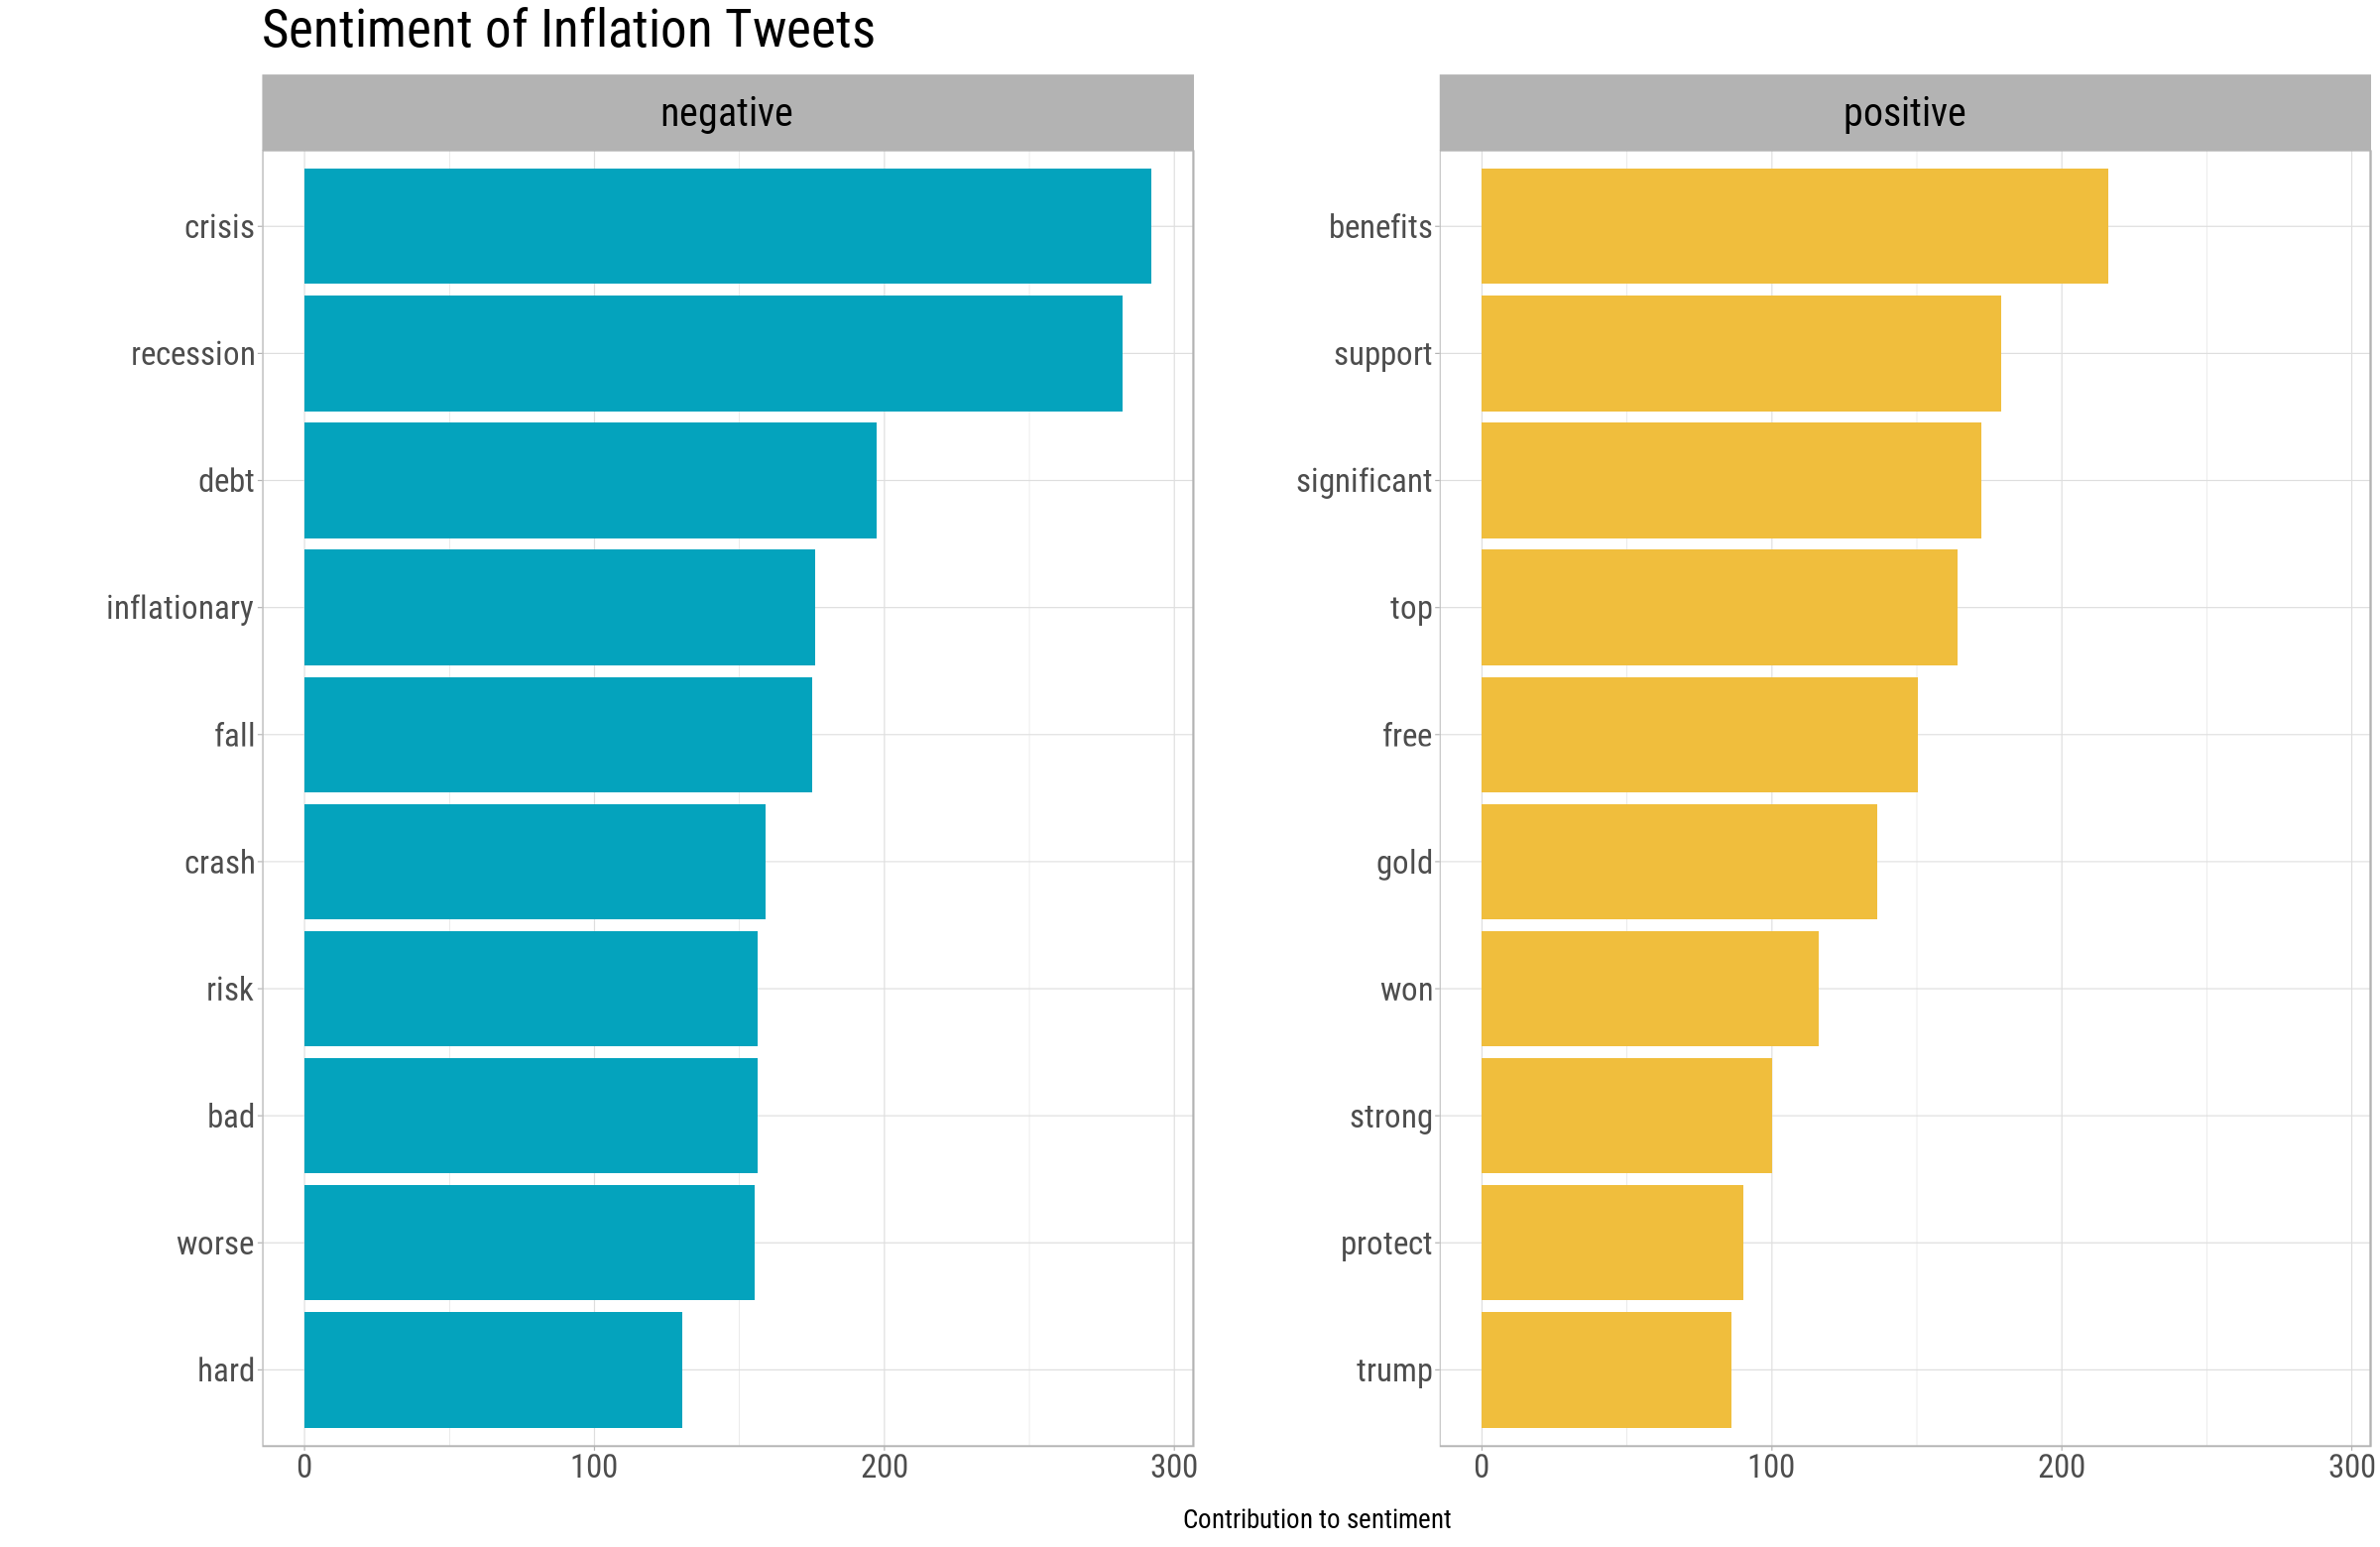

In [27]:
bing_word_counts %>%
  group_by(sentiment) %>%
  top_n(10) %>%
  ungroup() %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(word, n, fill = sentiment)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~sentiment, scales = "free_y") +
  scale_fill_manual(values = met.brewer("Lakota",2))+
  coord_flip()+
  theme_light()+
  theme(strip.text.x = element_text(size = 30, color = "black", family = "Roboto"))+
  theme(plot.title = element_text(size = 40, family = "Roboto", face = "bold"))+
  theme(axis.title.x = element_text(size = 20, family = 'Roboto'))+
  theme(axis.text.x =  element_text(size = 25, family = "Roboto", face = "bold"))+
  theme(axis.title.y = element_text(size = 20, family = "Roboto"))+
  theme(axis.text.y = element_text(size = 25, family = "Roboto", face = "bold"))+
  theme(legend.position = "none")+
  labs(title = "Sentiment of Inflation Tweets",
       y = "Contribution to sentiment",
       x = NULL) 

## Paired Word Analysis

In [28]:
inf_tweets_paired <- inf_clean %>%
  dplyr::select(stripped_text) %>%
  mutate(stripped_text = removeWords(stripped_text, stop_words$word))%>%
  unnest_tokens(paired_words, stripped_text, token = "ngrams", n = 2)
 
 
 inf_tweets_paired %>%
  count(paired_words, sort = TRUE)

paired_words,n
<chr>,<int>
NA,767
reduction act,395
inflation reduction,290
cost living,214
uk inflation,199
central bank,132
buying home,126
inflation rate,125
financial benefits,120


In [29]:
inf_tweets_separated <- inf_tweets_paired %>%
  separate(paired_words, c("word1", "word2"), sep = " ")

# new bigram counts:
inf_word_counts <- inf_tweets_separated %>%
  count(word1, word2, sort = TRUE)
inf_word_counts

word1,word2,n
<chr>,<chr>,<int>
NA,NA,767
reduction,act,395
inflation,reduction,290
cost,living,214
uk,inflation,199
central,bank,132
buying,home,126
inflation,rate,125
financial,benefits,120


Warning message in graph_from_data_frame(.):
“In `d' `NA' elements were replaced with string "NA"”


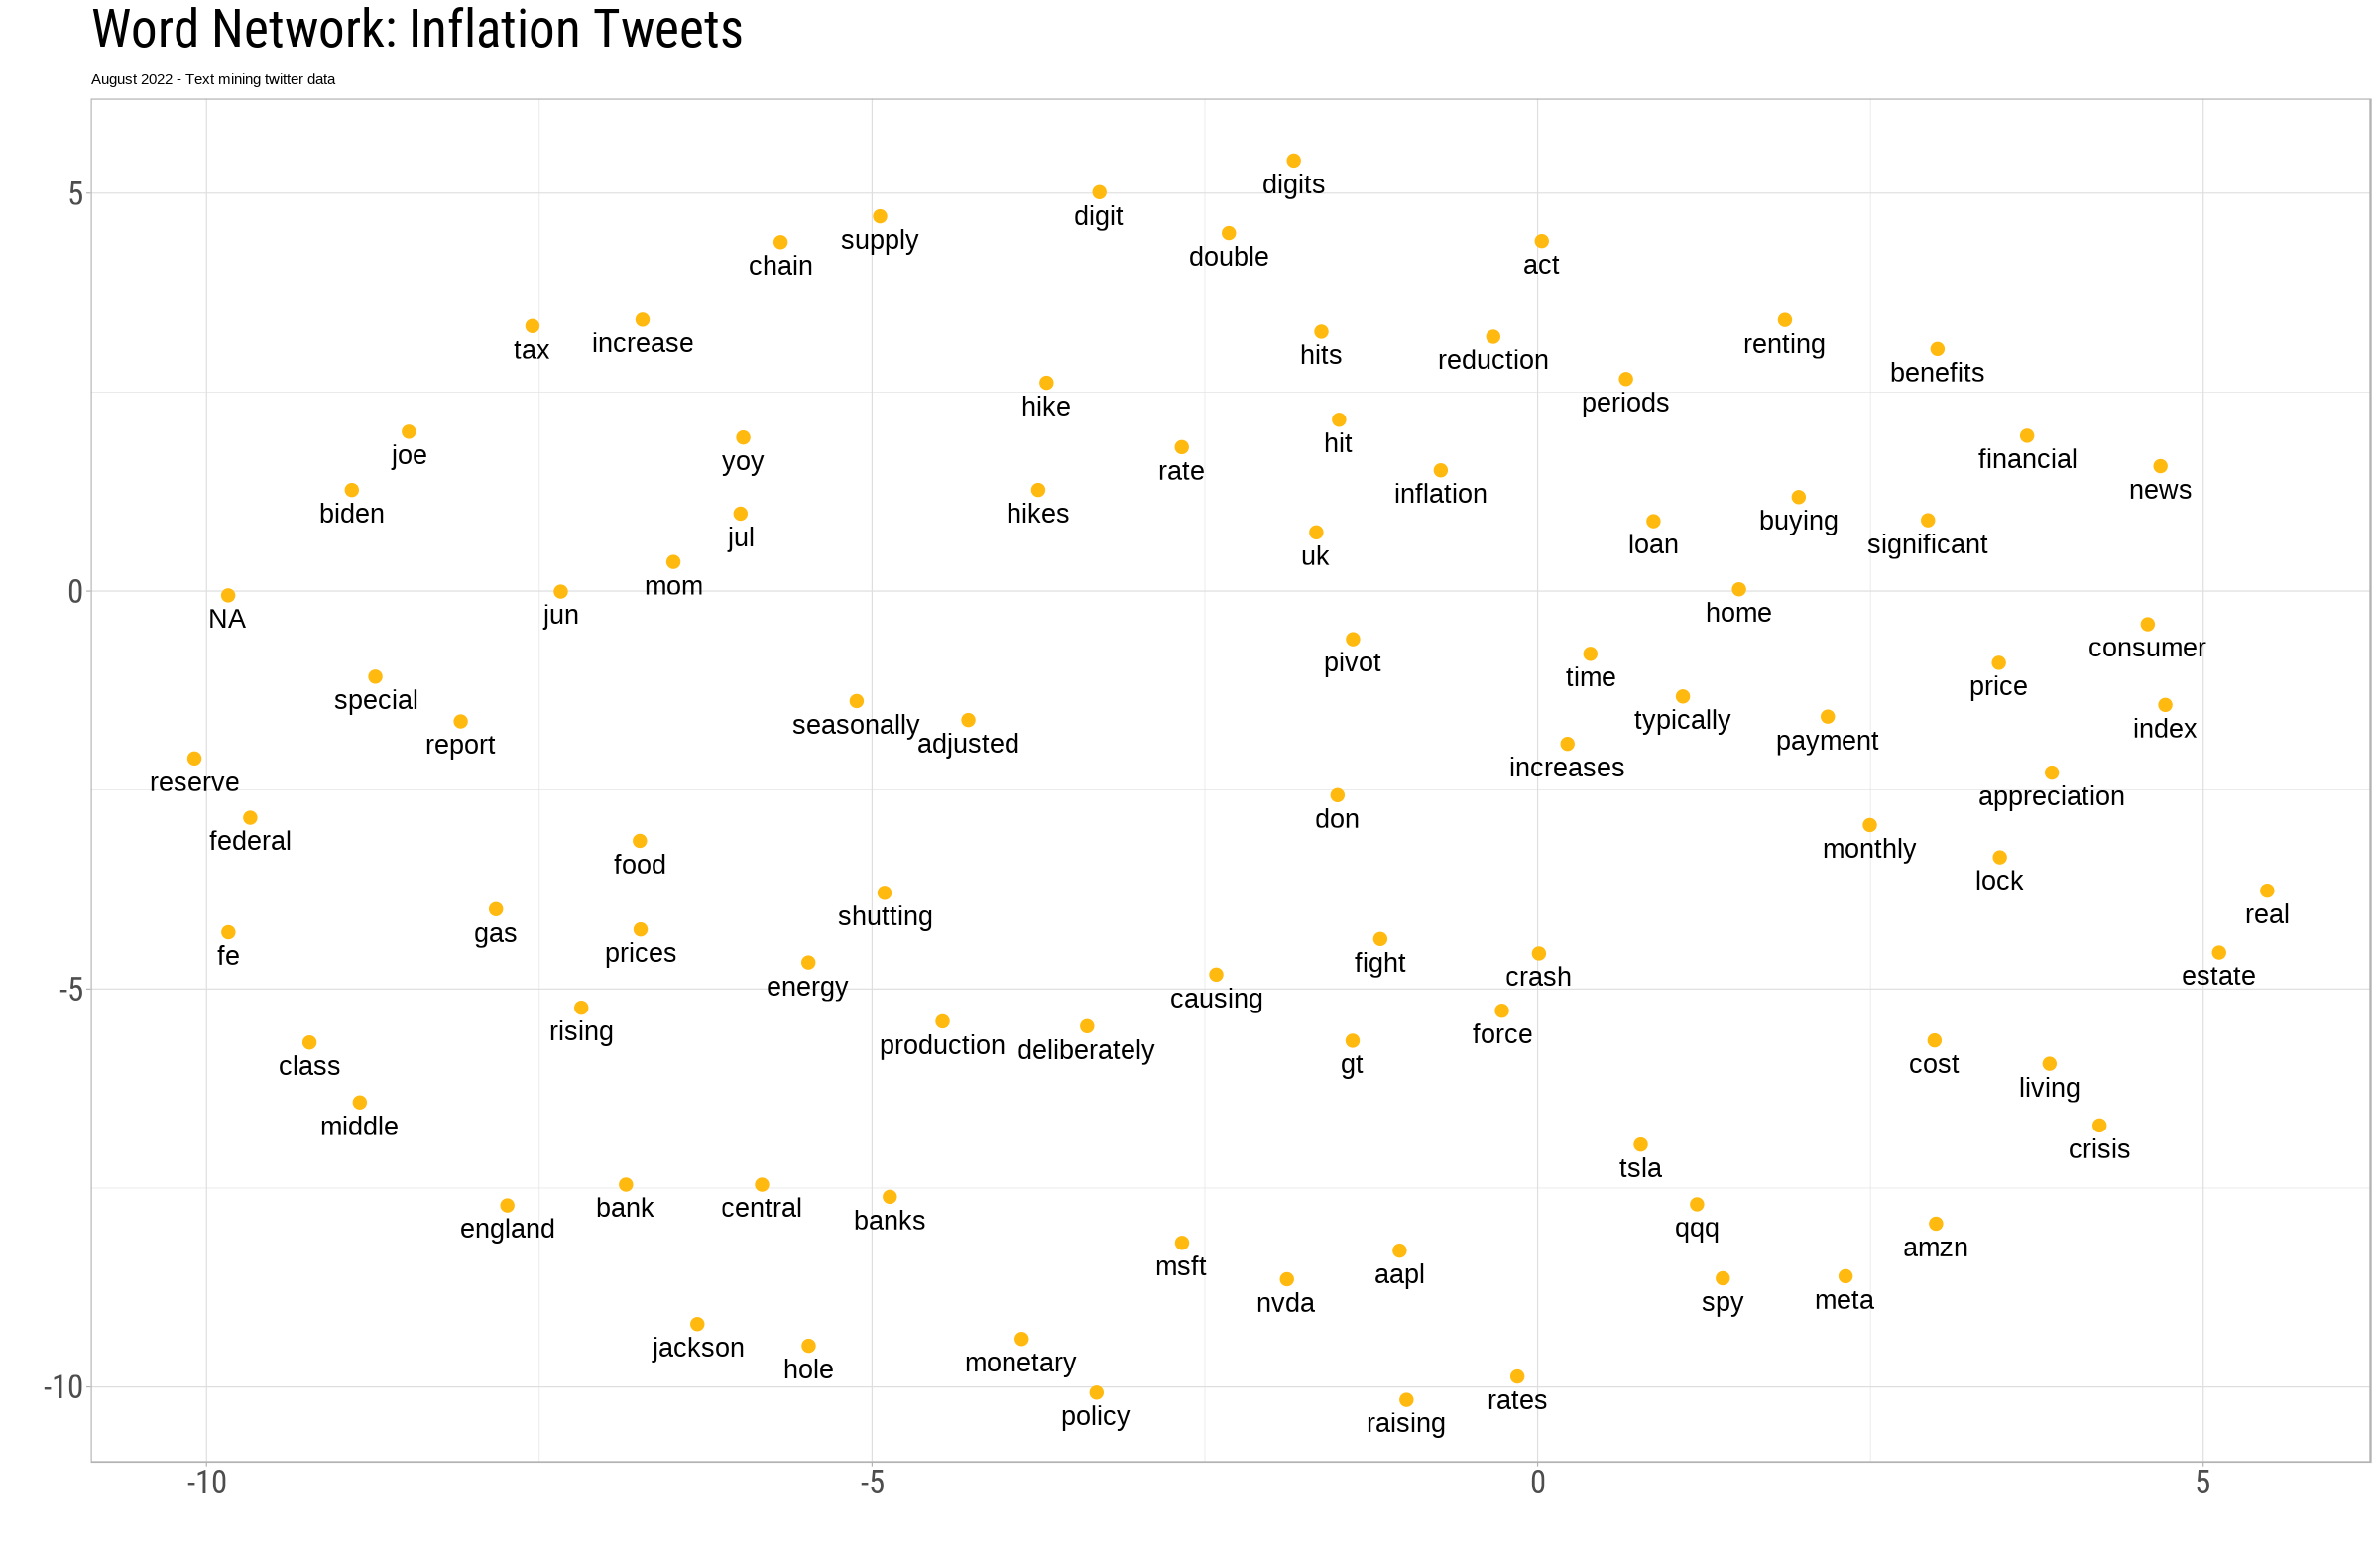

In [30]:
inf_word_counts %>%
filter(n >= 50) %>%
graph_from_data_frame() %>%
ggraph(layout = "fr") +
# geom_edge_link(aes(edge_alpha = n, edge_width = n)) +
geom_node_point(color = "darkgoldenrod1", size = 3) +
geom_node_text(aes(label = name), vjust = 1.8, size = 7) +
theme_light()+
theme(plot.title = element_text(size = 40, family = "Roboto", face = "bold"))+
theme(axis.title.x = element_text(size = 20, family = 'Roboto'))+
theme(axis.text.x =  element_text(size = 25, family = "Roboto", face = "bold"))+
theme(axis.title.y = element_text(size = 20, family = "Roboto"))+
theme(axis.text.y = element_text(size = 25, family = "Roboto", face = "bold"))+
theme(legend.position = "none")+
        labs(title = "Word Network: Inflation Tweets",
             subtitle = "August 2022 - Text mining twitter data ",
             x = "", y = "")

## Users Analysis

In [31]:
head(user)

,X,id,id_str,name,screen_name,location,description,url,protected,followers_count,⋯,created_at,favourites_count,verified,statuses_count,profile_image_url_https,profile_banner_url,default_profile,default_profile_image,derived,withheld_scope
,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<int>,⋯,<chr>,<int>,<lgl>,<int>,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>
1,1,2.539035e+07,2.539035e+07,OECD <U+27A1><U+FE0F> Better policies for better lives,OECD,Paris,The Organisation for Economic Co-operation & Development promotes better #policies for #BetterLives around the world. <U+0001F30F> <U+0001F449> Follow @MathiasCormann,https://t.co/LsbMwHegC4,FALSE,682201,⋯,Thu Mar 19 21:32:28 +0000 2009,3159,TRUE,19859,https://pbs.twimg.com/profile_images/1484187792229892100/giQY2kaR_normal.jpg,https://pbs.twimg.com/profile_banners/25390350/1655806812,FALSE,FALSE,NA,NA
2,2,8.635275e+08,8.635275e+08,Steve Hanke,steve_hanke,Baltimore & Paris,Economist @JohnsHopkins | Sr Fellow & Director #TroubledCurrencies Project @CatoInstitute | @NRO | FX & Commodity Trader | Reagan White House | Views are my own,https://t.co/ecvukxqbn9,FALSE,522929,⋯,Fri Oct 05 19:10:03 +0000 2012,6735,TRUE,43035,https://pbs.twimg.com/profile_images/915395033871867905/3zbE7bAT_normal.jpg,https://pbs.twimg.com/profile_banners/863527548/1465411293,FALSE,FALSE,NA,NA
3,3,4.012917e+07,4.012917e+07,Holger Zschaepitz,Schuldensuehner,"Berlin, Germany",Holger Zsch<e4>pitz is market maniac @Welt and Author of 'Schulden ohne S<fc>hne?' a book on states' addictiveness to debt. Pics: https://t.co/YTtE1n2ifn,https://t.co/nuuKmtRtJK,FALSE,264646,⋯,Fri May 15 00:26:19 +0000 2009,7633,TRUE,79965,https://pbs.twimg.com/profile_images/799730879064993792/_ErzqsW2_normal.jpg,https://pbs.twimg.com/profile_banners/40129171/1365866294,FALSE,FALSE,NA,NA
4,4,1.502505e+18,1.502505e+18,BreezyUniverse,BreezyBUniverse,,Be water,NA,FALSE,25,⋯,Sat Mar 12 04:42:06 +0000 2022,704,FALSE,769,https://pbs.twimg.com/profile_images/1560312749221187585/UnfHN78D_normal.jpg,https://pbs.twimg.com/profile_banners/1502505107094708226/1655502015,TRUE,FALSE,NA,NA
5,5,1.472184e+07,1.472184e+07,The_Nation,The_Nation,Pakistan,Keeping you updated on the go,https://t.co/0EM7sfrruq,FALSE,105987,⋯,Sat May 10 05:33:30 +0000 2008,374,TRUE,205425,https://pbs.twimg.com/profile_images/1096386671984156673/FqJigc0x_normal.png,https://pbs.twimg.com/profile_banners/14721839/1640780060,FALSE,FALSE,NA,NA
6,6,1.459370e+18,1.459370e+18,<U+0001F51E><U+0001F499>BURST_BOY<U+0001F499>_( <U+0361><b0><U+0001F445> <U+0361><b0>)<U+0001F51E>,BURSTBOY123,none of your business <U+0001F621>,<U+0001F5FF> Hi! I'm a clown boy & I love all sorts of types of inflation(boy or girl inflation)hope u enjoy my arts! #inflationart #expansion #bodyinflation,NA,FALSE,212,⋯,Sat Nov 13 03:58:38 +0000 2021,15465,FALSE,4659,https://pbs.twimg.com/profile_images/1548332692969627648/ETzAeMIe_normal.jpg,https://pbs.twimg.com/profile_banners/1459369836040105985/1656029675,TRUE,FALSE,NA,NA


In [32]:
glimpse(user)

Rows: 15,921
Columns: 22
$ X                       <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,…
$ id                      <dbl> 2.539035e+07, 8.635275e+08, 4.012917e+07, 1.50…
$ id_str                  <dbl> 2.539035e+07, 8.635275e+08, 4.012917e+07, 1.50…
$ name                    <chr> "OECD <U+27A1><U+FE0F> Better policies for bet…
$ screen_name             <chr> "OECD", "steve_hanke", "Schuldensuehner", "Bre…
$ location                <chr> "Paris", "Baltimore & Paris", "Berlin, Germany…
$ description             <chr> "The Organisation for Economic Co-operation & …
$ url                     <chr> "https://t.co/LsbMwHegC4", "https://t.co/ecvuk…
$ protected               <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALS…
$ followers_count         <int> 682201, 522929, 264646, 25, 105987, 212, 518, …
$ friends_count           <int> 966, 6766, 340, 15, 273, 2799, 796, 382, 127, …
$ listed_count            <int> 7647, 3390, 5955, 0, 665, 0, 4, 0, 2, 3764, 29…
$ created_at   

In [40]:
user$loction <- iconv(user$location, from = 'ISO-8859-1', to = 'utf8')

In [42]:
user$new_location <- user$location
user$new_location <- user$new_location
user$new_location <- gsub("@\\w+", "", user$new_location)  
user$new_location <- gsub("https?://.+", "", user$new_location)  
user$new_location <- gsub("\\d+\\w*\\d*", "", user$new_location)  
user$new_location <- gsub("#\\w+", "", user$new_location)  
user$new_location <- gsub("[^\x01-\x7F]", "", user$new_location)  
user$new_location <- gsub("[[:punct:]]", " ", user$new_location)
user$new_location <- gsub("\n", " ", user$new_location)  
user$new_location <- gsub("^\\s+", "", user$new_location)  
user$new_location <- gsub("\\s+$", "", user$new_location)  
user$new_location <- gsub("[ |\t]+", " ", user$new_location)

Selecting by n


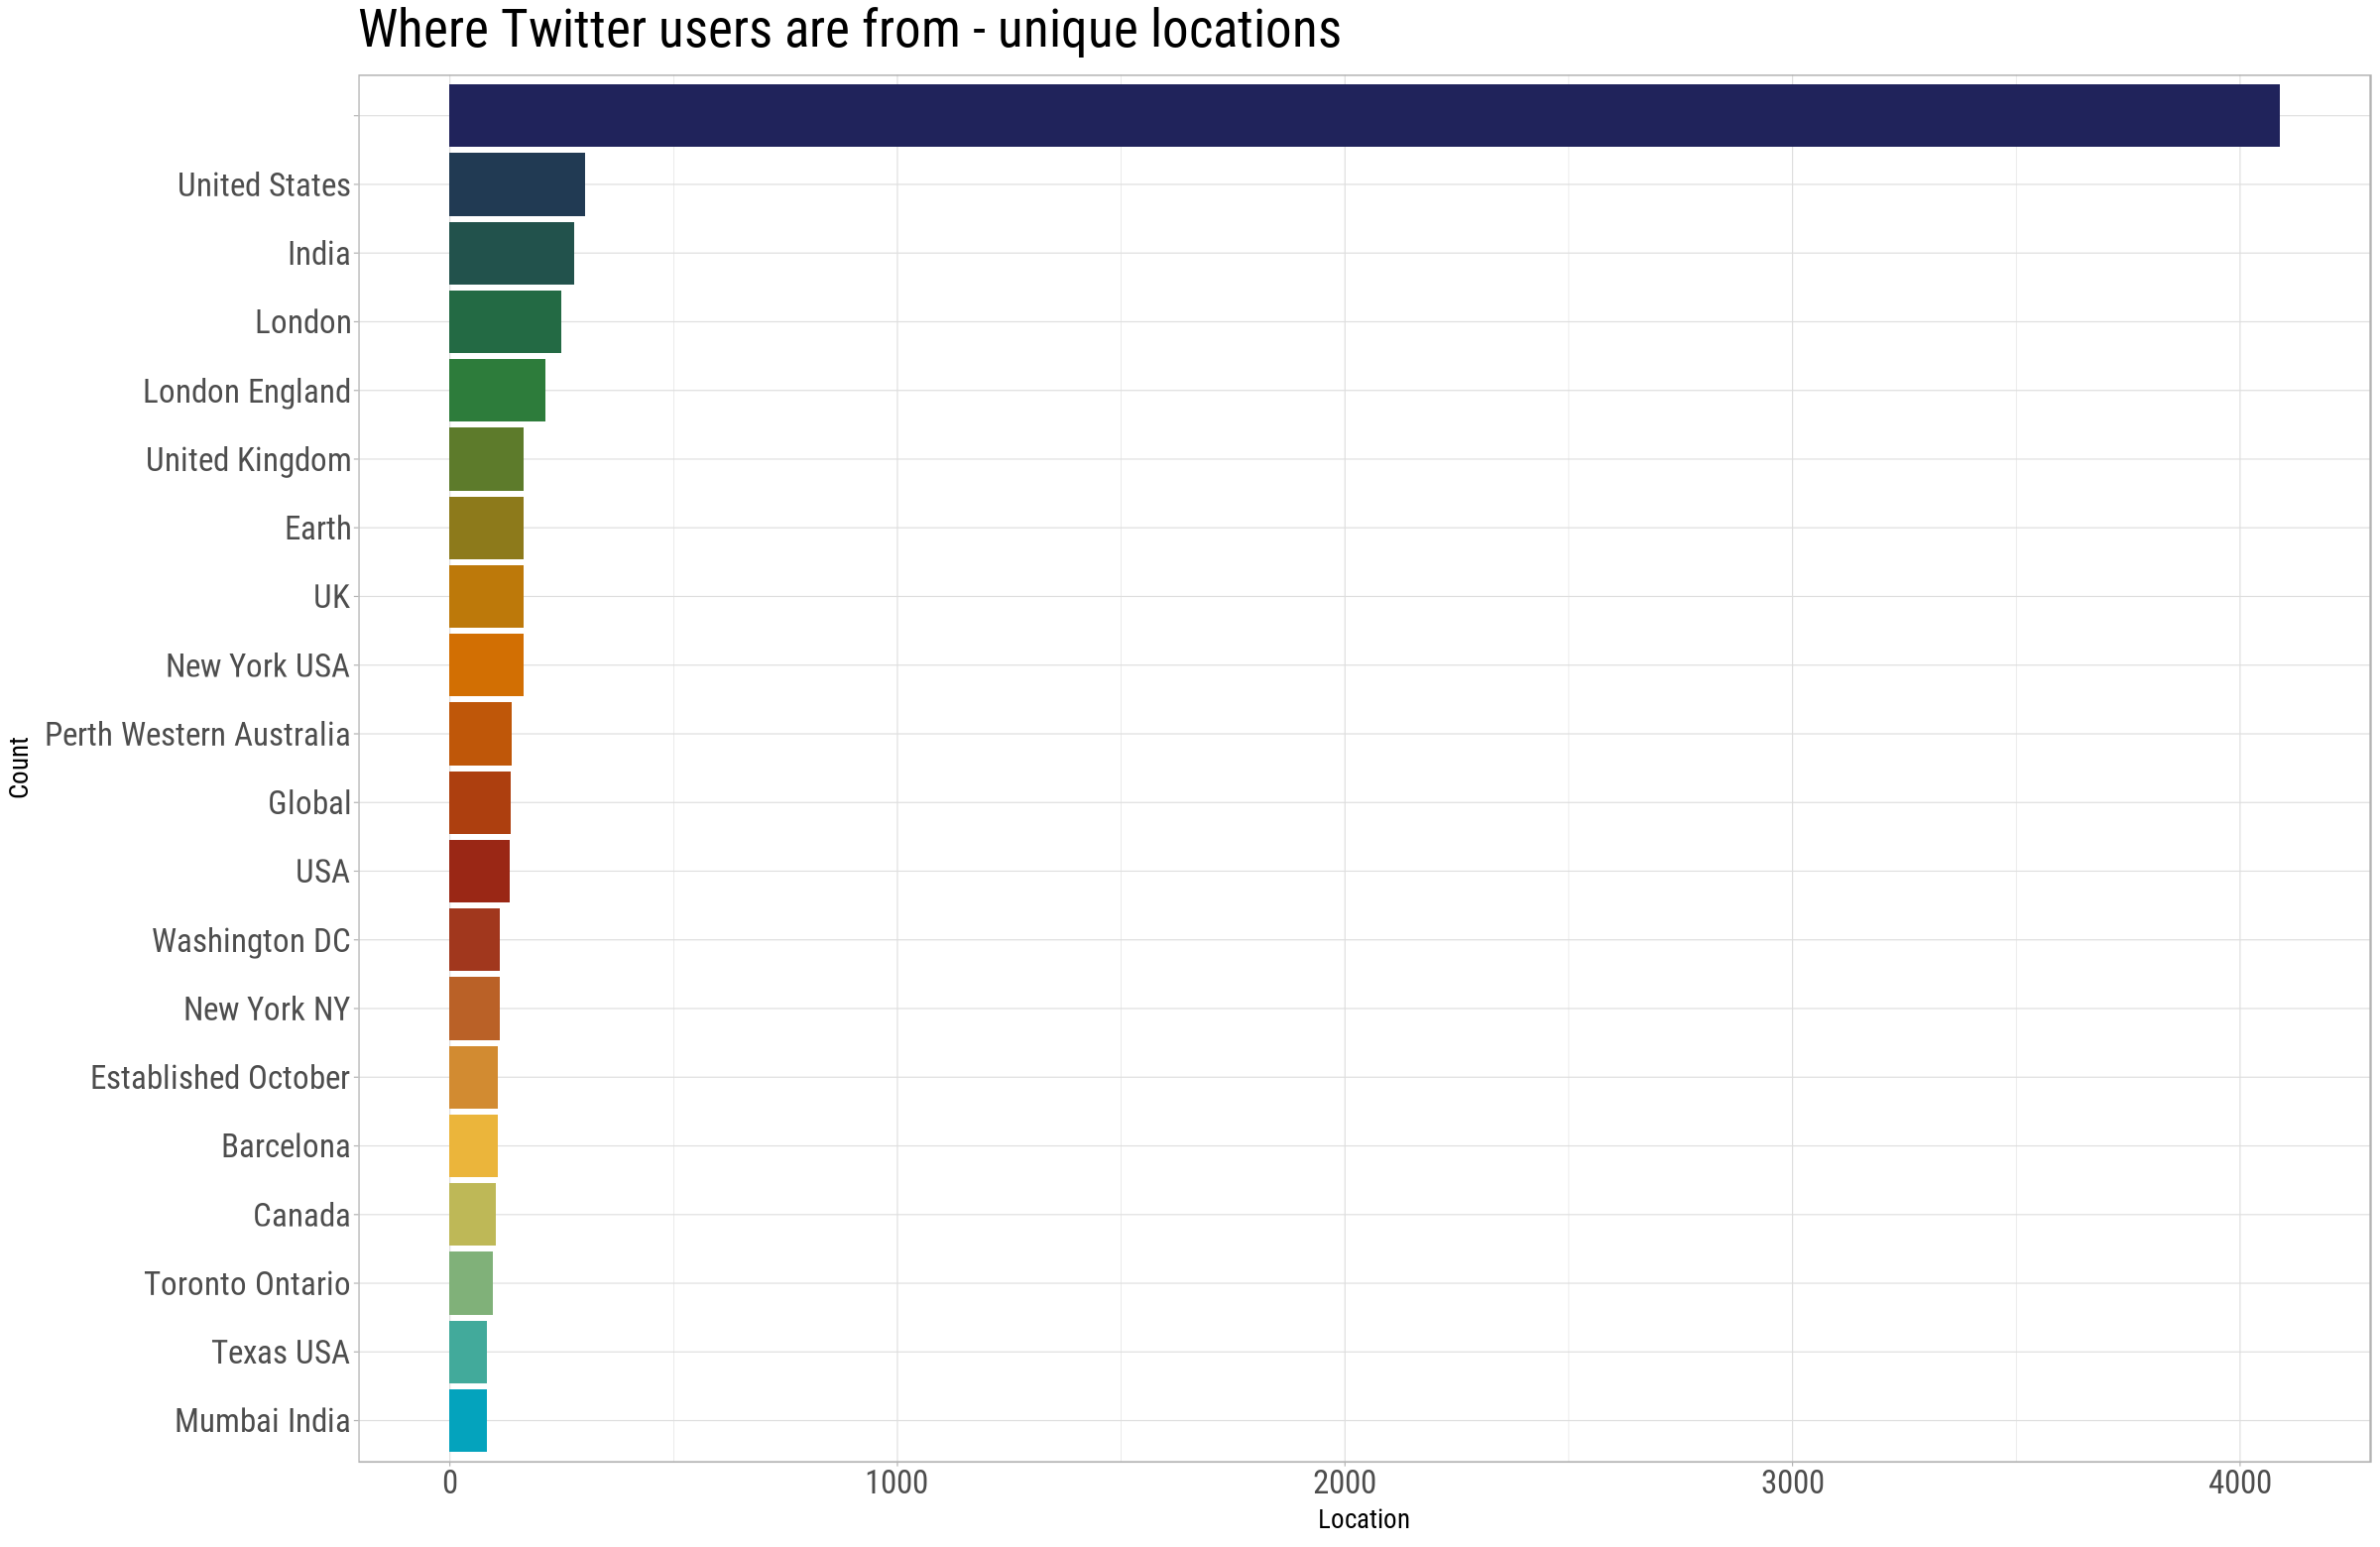

In [44]:
user %>%
  count(new_location, sort = TRUE) %>%
  mutate(new_location = reorder(new_location, n)) %>%
  top_n(20) %>%
  ggplot(aes(x = new_location, y = n, fill = new_location)) +
  geom_col() +
  coord_flip() +
  scale_fill_manual(values = met.brewer("Lakota",20))+
  theme_light()+
  theme(plot.title = element_text(size = 40, family = "Roboto", face = "bold"))+
  theme(axis.title.x = element_text(size = 20, family = 'Roboto'))+
  theme(axis.text.x =  element_text(size = 25, family = "Roboto", face = "bold"))+
  theme(axis.title.y = element_text(size = 20, family = "Roboto"))+
  theme(axis.text.y = element_text(size = 25, family = "Roboto", face = "bold"))+
  theme(legend.position = "none")+
      labs(x = "Count",
      y = "Location",
      title = "Where Twitter users are from - unique locations ")

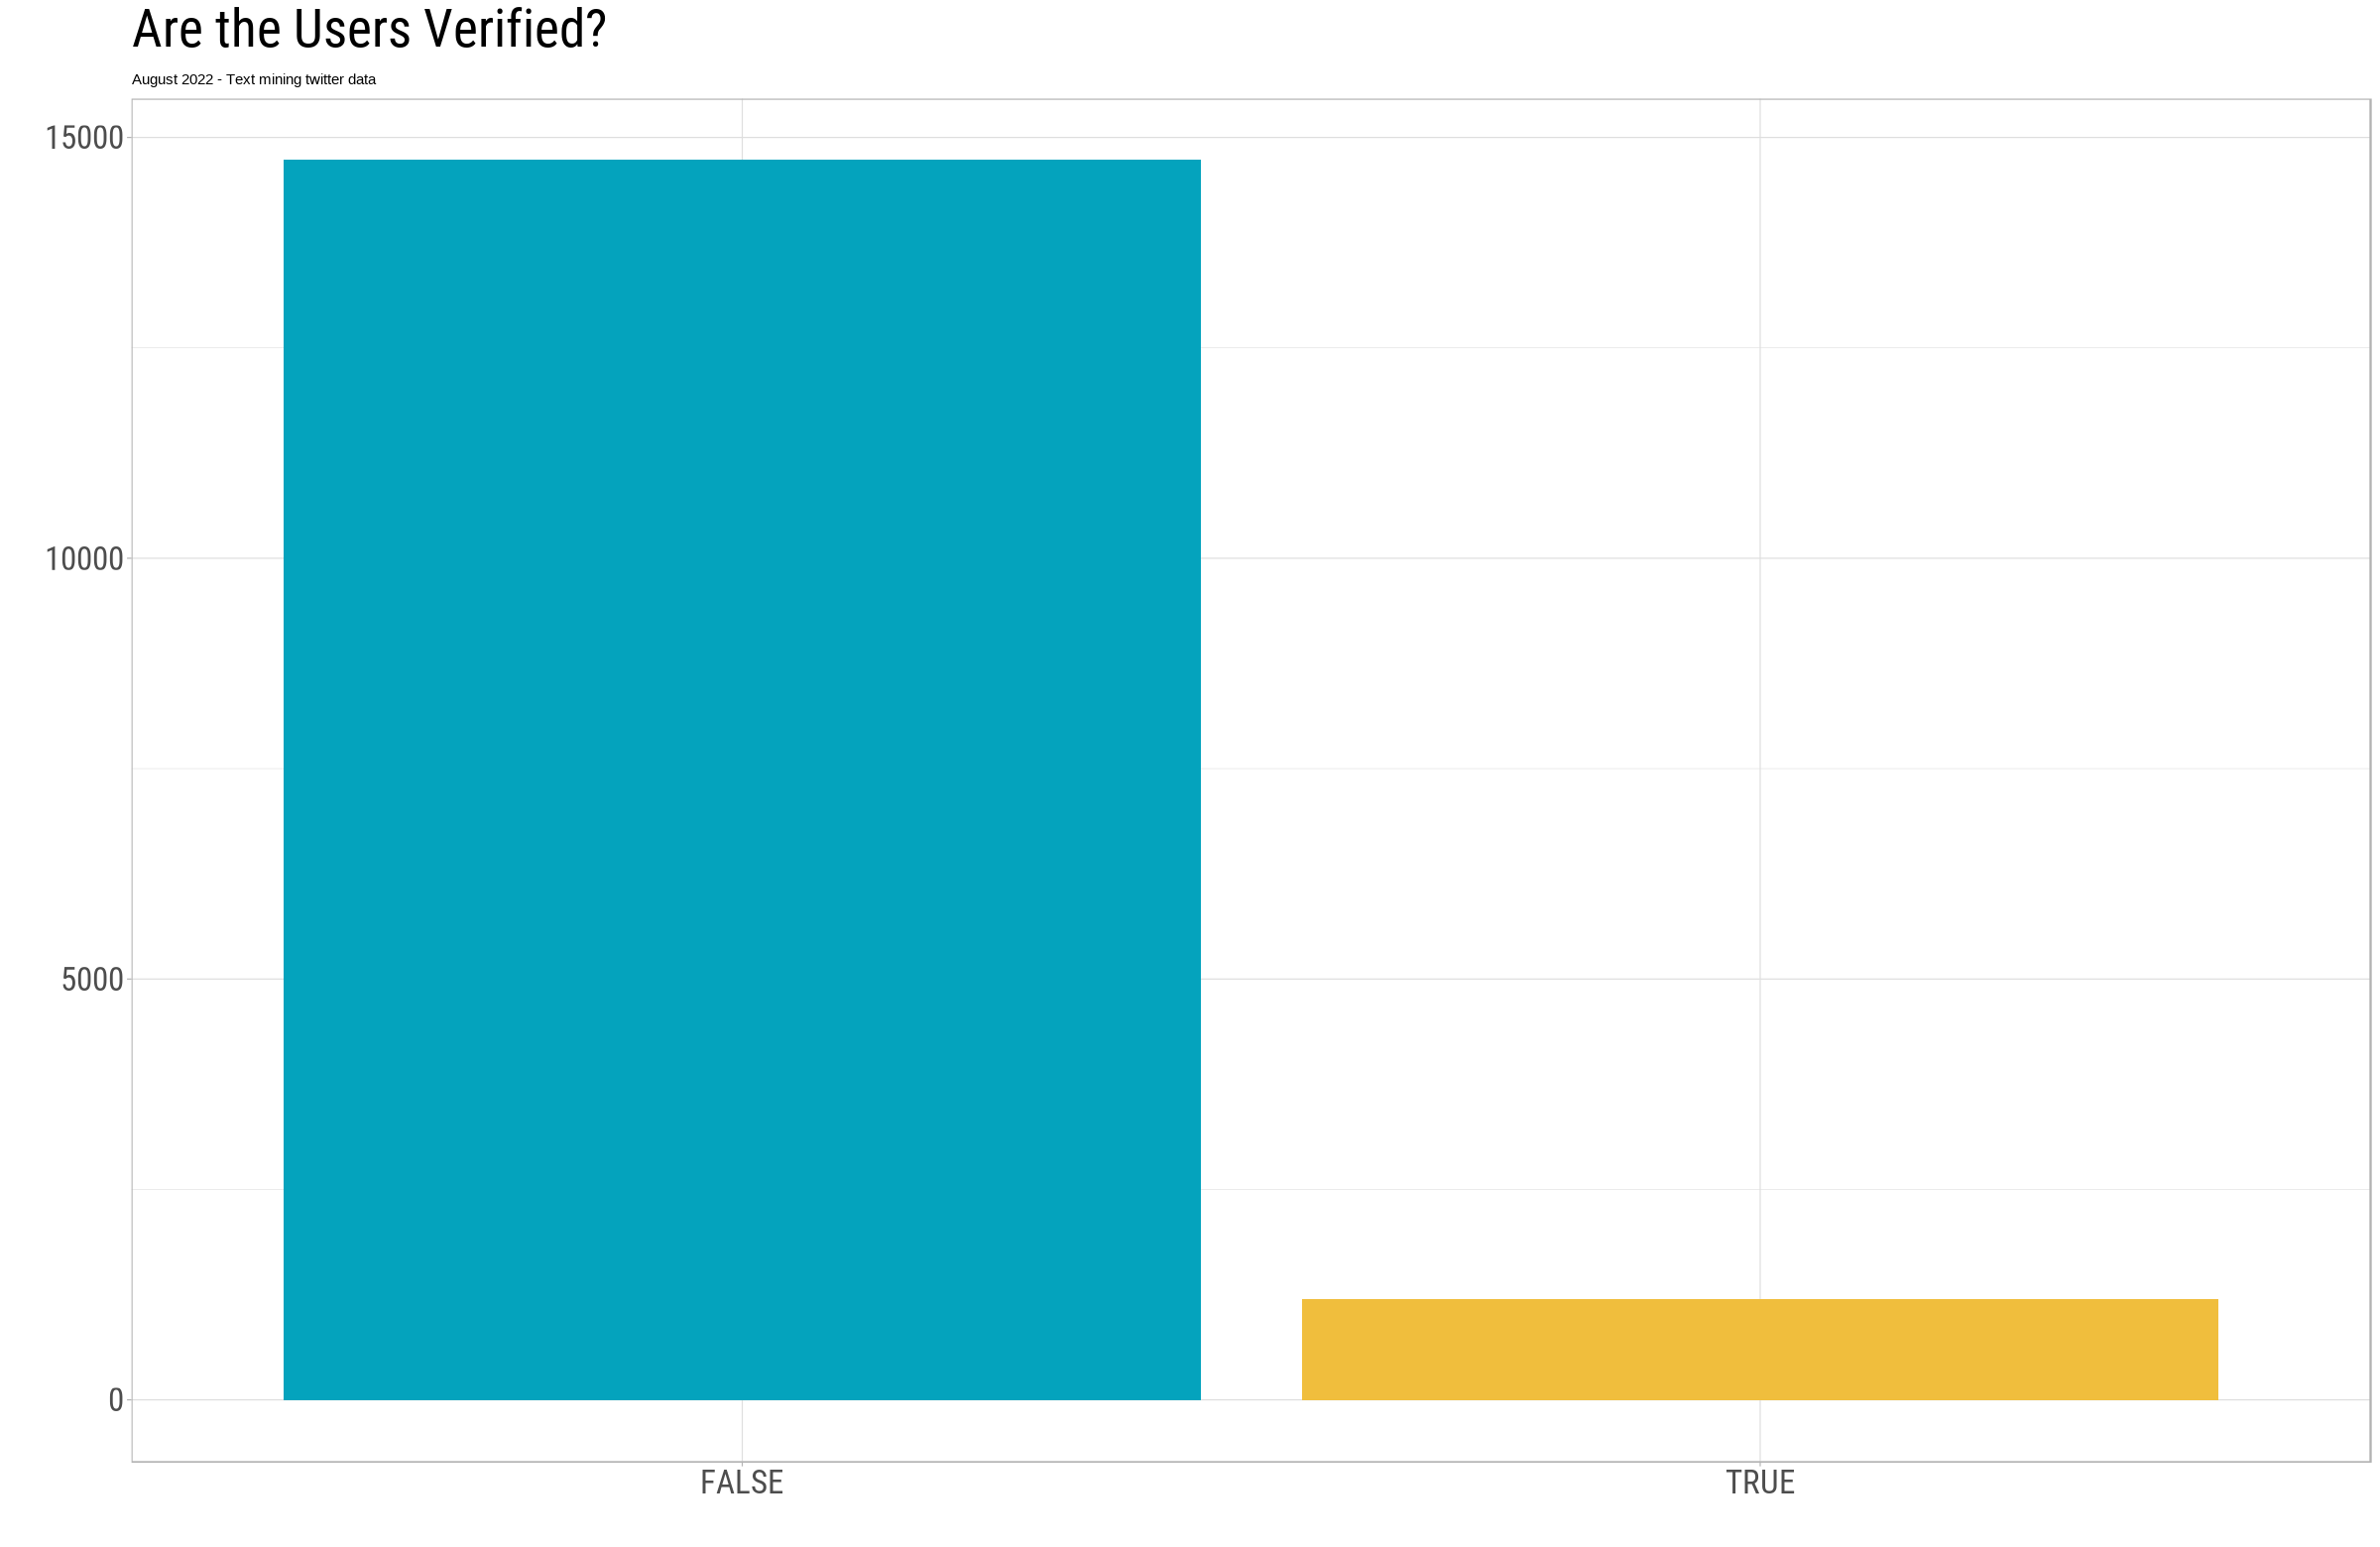

In [46]:
user %>%
  count(verified)%>%
  ggplot(aes(verified, n, fill = verified))+
  geom_col()+
  scale_fill_manual(values = met.brewer("Lakota",2))+
  theme_light()+
  theme(plot.title = element_text(size = 40, family = "Roboto", face = "bold"))+
  theme(axis.title.x = element_text(size = 20, family = 'Roboto'))+
  theme(axis.text.x =  element_text(size = 25, family = "Roboto", face = "bold"))+
  theme(axis.title.y = element_text(size = 20, family = "Roboto"))+
  theme(axis.text.y = element_text(size = 25, family = "Roboto", face = "bold"))+
  theme(legend.position = "none")+
        labs(title = "Are the Users Verified?",
             subtitle = "August 2022 - Text mining twitter data ",
             x = "", y = "")